In [331]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


## 1. Starter Analysis

In [332]:
spotify_stream_df = pd.read_json("MyData/StreamingHistory0.json")
spotify_stream_df.tail()

,endTime,artistName,trackName,msPlayed
8828,2023-05-05 14:21,A$AP Ferg,"Dreams, Fairytales, Fantasies (feat. Brent Fai...",709
8829,2023-05-05 14:21,A$AP Ferg,Floor Seats,0
8830,2023-05-05 14:21,Kendrick Lamar,u,833
8831,2023-05-05 14:26,Baby Keem,trademark usa,270670
8832,2023-05-05 14:27,A$AP Ferg,Floor Seats,70224


In [333]:
spotify_stream_df.shape

(8833, 4)

In [334]:
spotify_stream_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8833 entries, 0 to 8832
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     8833 non-null   object
 1   artistName  8833 non-null   object
 2   trackName   8833 non-null   object
 3   msPlayed    8833 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 276.2+ KB


In [335]:
spotify_stream_df.nunique() # To see the unique elemetns present in each column

endTime       4662
artistName     695
trackName     1810
msPlayed      4709
dtype: int64

In [336]:
spotify_stream_df.sample(10)

,endTime,artistName,trackName,msPlayed
5586,2023-03-17 08:20,KK,"Ajab Si (From ""Om Shanti Om"")",241668
4358,2023-02-19 21:32,Tory Lanez,Sorry 4 What? // LV BELT,154632
5170,2023-03-07 07:27,Kendrick Lamar,The Art of Peer Pressure,884
5382,2023-03-12 09:17,Metro Boomin,Superhero (Heroes & Villains) [with Future & C...,182666
3219,2023-02-03 01:36,Young Thug,Climax (feat. 6lack),747
7339,2023-04-06 14:48,Mohit Chauhan,Tum Ho,2734
1445,2022-12-29 16:03,Lil Wayne,Mona Lisa (feat. Kendrick Lamar),324189
493,2022-12-11 16:05,Metro Boomin,Niagara Falls (Foot or 2) [with Travis Scott &...,181714
7884,2023-04-20 07:57,"Tyler, The Creator",STUNTMAN (feat. Vince Staples),0
5570,2023-03-16 13:28,Ice Cube,It Was A Good Day,260000


In [337]:
len(spotify_stream_df["artistName"].unique()) # Length of unique artist

695

there's 695 number of unique artist in my streaming history

In [338]:
len(spotify_stream_df["trackName"].unique()) # Length of unique tracks

1810

there's 1816 number of unique songs in my streaming history

## 2. Cleaning and Formatting Data

pd.to_datetime method from Pandas module to convert a object column into proper date time column.

using the to_datetime module to obatin the proper date time format and then we added that into a new column called Play-Time.

In [339]:
spotify_stream_df["Play-Time"]= pd.to_datetime(spotify_stream_df["endTime"])

In [340]:
spotify_stream_df['year'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).year
spotify_stream_df['month'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).month
spotify_stream_df['day'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).day
spotify_stream_df['weekday'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).weekday
spotify_stream_df['time'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).time
spotify_stream_df['hours'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).hour
spotify_stream_df['day-name'] = spotify_stream_df["Play-Time"].apply(lambda x: x.day_name())
spotify_stream_df['Count'] = 1 

In [341]:
spotify_stream_df["Time-Played (hh-mm-ss)"] = pd.to_timedelta(spotify_stream_df["msPlayed"], unit='ms')

hours and minutes calculation

In [342]:
def hours(td):
    return td.seconds/3600

def minutes(td):
    return (td.seconds/60)%60

spotify_stream_df["Listening Time(Hours)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(hours).round(3)
spotify_stream_df["Listening Time(Minutes)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(minutes).round(3)


In [343]:
spotify_stream_df.sample(10)

,endTime,artistName,trackName,msPlayed,Play-Time,year,month,day,weekday,time,hours,day-name,Count,Time-Played (hh-mm-ss),Listening Time(Hours),Listening Time(Minutes)
2852,2023-01-26 12:55,21 Savage,My Choppa Hate Niggas,85277,2023-01-26 12:55:00,2023,1,26,3,12:55:00,12,Thursday,1,0 days 00:01:25.277000,0.024,1.417
4862,2023-02-28 05:17,Metro Boomin,Around Me (feat. Don Toliver),0,2023-02-28 05:17:00,2023,2,28,1,05:17:00,5,Tuesday,1,0 days 00:00:00,0.000,0.000
2389,2023-01-16 11:54,Kendrick Lamar,YAH.,160293,2023-01-16 11:54:00,2023,1,16,0,11:54:00,11,Monday,1,0 days 00:02:40.293000,0.044,2.667
6729,2023-03-30 06:45,JPEGMAFIA,Lean Beef Patty,50568,2023-03-30 06:45:00,2023,3,30,3,06:45:00,6,Thursday,1,0 days 00:00:50.568000,0.014,0.833
4048,2023-02-14 16:37,Eminem,Survival,8739,2023-02-14 16:37:00,2023,2,14,1,16:37:00,16,Tuesday,1,0 days 00:00:08.739000,0.002,0.133
2626,2023-01-20 12:39,Joji,MODUS,10494,2023-01-20 12:39:00,2023,1,20,4,12:39:00,12,Friday,1,0 days 00:00:10.494000,0.003,0.167
5937,2023-03-21 12:13,21 Savage,My Dawg,890,2023-03-21 12:13:00,2023,3,21,1,12:13:00,12,Tuesday,1,0 days 00:00:00.890000,0.000,0.000
2282,2023-01-14 04:40,Kanye West,Monster,1730,2023-01-14 04:40:00,2023,1,14,5,04:40:00,4,Saturday,1,0 days 00:00:01.730000,0.000,0.017
5139,2023-03-06 10:23,Kendrick Lamar,untitled 02 | 06.23.2014.,258826,2023-03-06 10:23:00,2023,3,6,0,10:23:00,10,Monday,1,0 days 00:04:18.826000,0.072,4.300
8250,2023-04-25 14:07,Baby Keem,family ties (with Kendrick Lamar),0,2023-04-25 14:07:00,2023,4,25,1,14:07:00,14,Tuesday,1,0 days 00:00:00,0.000,0.000


dropping
1. endTime as we have Play-Time column
2. msPlayed as we got the Time-Played (hh-mm-ss)
3. Time-Played (hh-mm-ss) as we got the approx time in minutes and hours in Listening Time(Hours) and Listening Time(Minutes).


In [344]:
spotify_stream_df.drop(columns=["endTime","Time-Played (hh-mm-ss)","msPlayed"], inplace=True)

In [345]:
spotify_stream_df.describe()

,Play-Time,year,month,day,weekday,hours,Count,Listening Time(Hours),Listening Time(Minutes)
count,8833,8833.000000,8833.000000,8833.000000,8833.000000,8833.000000,8833.0,8833.000000,8833.000000
mean,2023-02-20 13:53:07.607834112,2022.829956,4.236160,15.382996,2.965697,11.715725,1.0,0.023444,1.400841
min,2022-12-02 14:14:00,2022.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,2023-01-14 03:40:00,2023.000000,2.000000,7.000000,1.000000,7.000000,1.0,0.000000,0.017000
50%,2023-02-20 07:38:00,2023.000000,3.000000,16.000000,3.000000,12.000000,1.0,0.003000,0.183000
75%,2023-03-29 17:29:00,2023.000000,4.000000,23.000000,5.000000,17.000000,1.0,0.050000,3.017000
max,2023-05-05 14:27:00,2023.000000,12.000000,31.000000,6.000000,23.000000,1.0,1.208000,12.500000
std,NaN,0.375693,3.676566,8.746669,1.928835,6.093839,0.0,0.031123,1.710297


## 3. Exploratory Data Analysis and Visualization

In [346]:
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

/tmp/ipykernel_7039/1738326915.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


### 3.1 unique artist exploration

In [347]:
unique_artists = spotify_stream_df["artistName"].nunique() 
total_artists = spotify_stream_df["artistName"].count() 
unique_artist_percentage = unique_artists/total_artists*100 
unique_artist_percentage

7.8682214423185775

### 3.2 top 10 unique artist

In [348]:
top_10_artist_df = spotify_stream_df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_artist_df.head(10)

,Listening Time(Hours),Listening Time(Minutes),Count
artistName,,,
Metro Boomin,27.558,1654.526,893
Kendrick Lamar,24.485,1471.179,1098
21 Savage,16.434,987.067,611
Drake,9.393,565.509,400
Kanye West,8.778,526.805,345
Baby Keem,5.862,351.867,259
Joji,5.480,329.040,270
Travis Scott,5.002,299.826,230
The Local Train,3.543,211.851,132


In [349]:
top_10_artist_time_df = spotify_stream_df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Metro Boomin'),
  Text(1, 0, 'Kendrick Lamar'),
  Text(2, 0, '21 Savage'),
  Text(3, 0, 'Drake'),
  Text(4, 0, 'Kanye West'),
  Text(5, 0, 'Baby Keem'),
  Text(6, 0, 'Joji'),
  Text(7, 0, 'Travis Scott'),
  Text(8, 0, 'The Local Train'),
  Text(9, 0, 'Aditya Rikhari')])

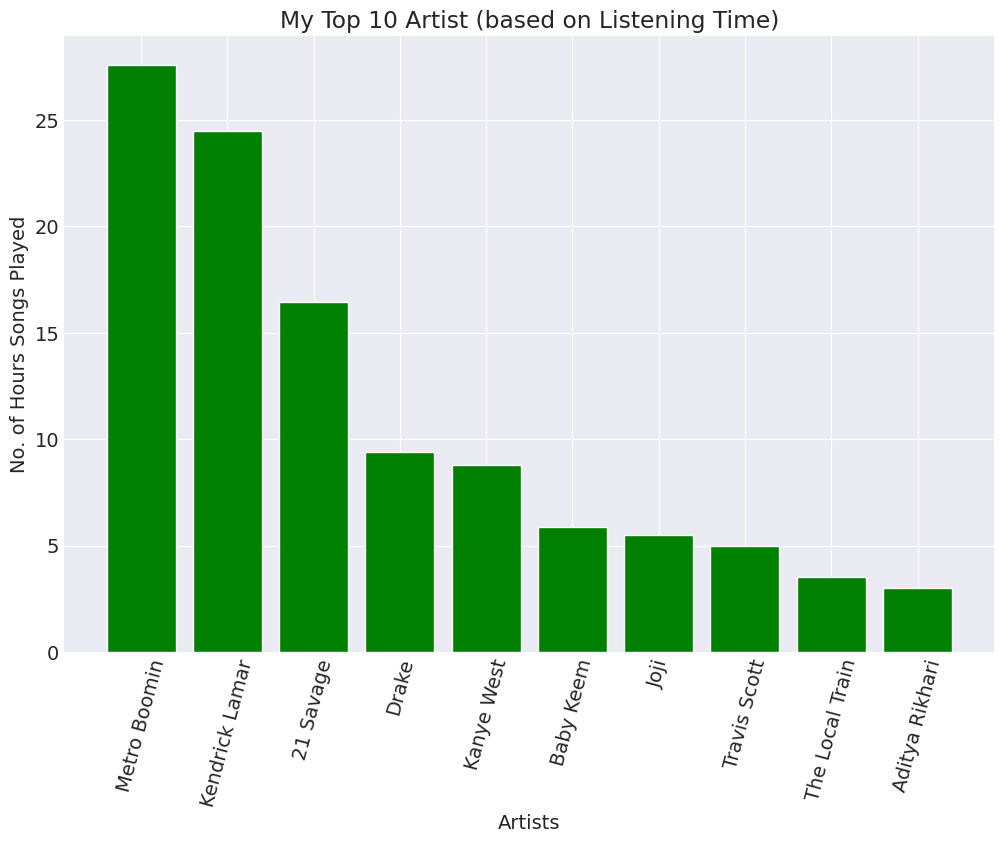

In [350]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_time_df.head(10).index,top_10_artist_time_df["Listening Time(Hours)"].head(10),color='green')
ax.set(title="My Top 10 Artist (based on Listening Time)",xlabel="Artists",ylabel="No. of Hours Songs Played")
plt.xticks(rotation=75)

black dashed line is the mean

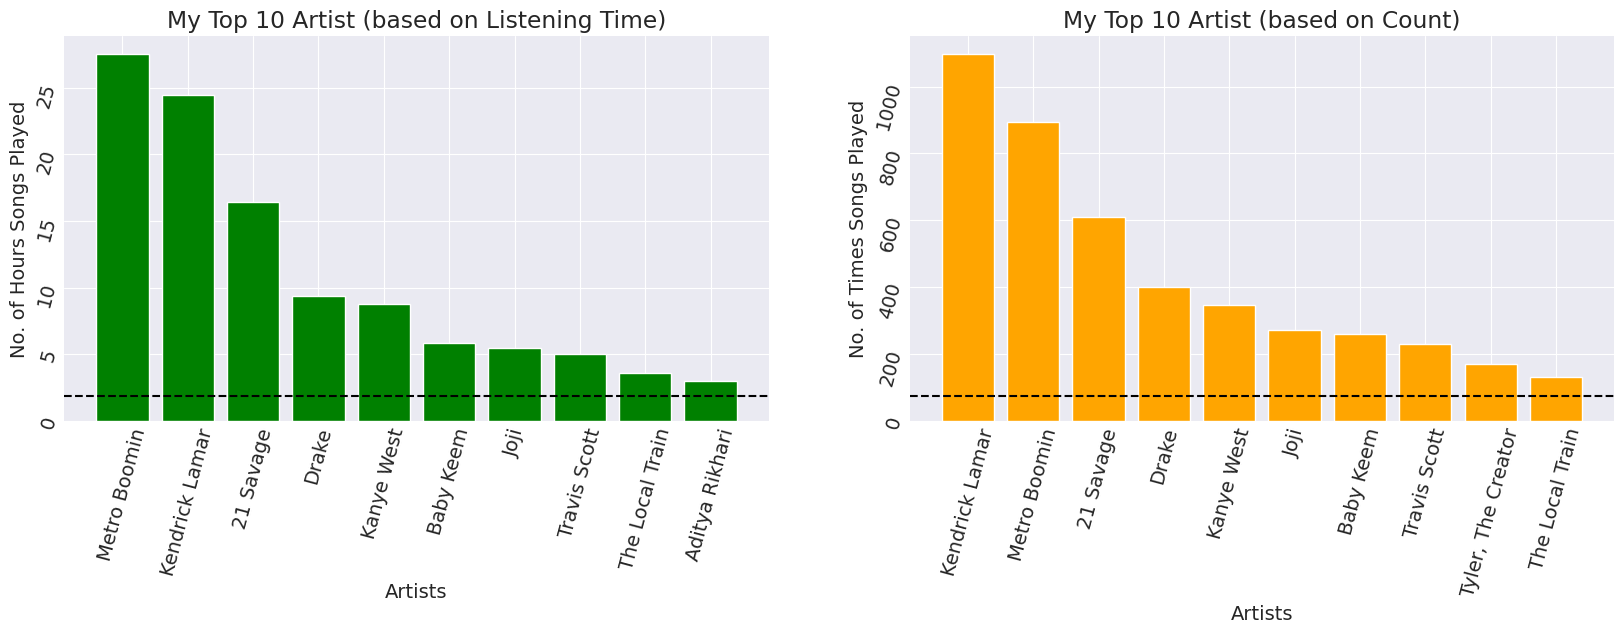

In [351]:
top_10_artist_count_df = spotify_stream_df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

ax1.bar(top_10_artist_df.head(10).index,top_10_artist_time_df["Listening Time(Hours)"].head(10), color="green")
ax1.set(title="My Top 10 Artist (based on Listening Time)",xlabel="Artists",ylabel="No. of Hours Songs Played");
ax1.tick_params(labelrotation=75)
ax1.axhline(top_10_artist_time_df["Listening Time(Hours)"][:100].mean(), linestyle="--", color="black")

ax2.bar(top_10_artist_count_df.head(10).index,top_10_artist_count_df["Count"].head(10), color="orange")
ax2.set(title="My Top 10 Artist (based on Count)",xlabel="Artists",ylabel="No. of Times Songs Played");
ax2.tick_params(labelrotation=75)
ax2.axhline(top_10_artist_count_df["Count"][:100].mean(), linestyle="--", color="black");
fig.savefig("Plots/top10.png",facecolor="#000000")

### 3.3 Song track exploration

3.3.1 percentage of unique songs

In [352]:
unique_songs = spotify_stream_df["trackName"].nunique()
total_songs = spotify_stream_df["trackName"].count()
unique_songs_percentage = unique_songs/total_songs*100
unique_songs_percentage

20.491339295822485

In [353]:
top_10_songs_time_df = spotify_stream_df.groupby(["trackName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_songs_count_df = spotify_stream_df.groupby(["trackName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)

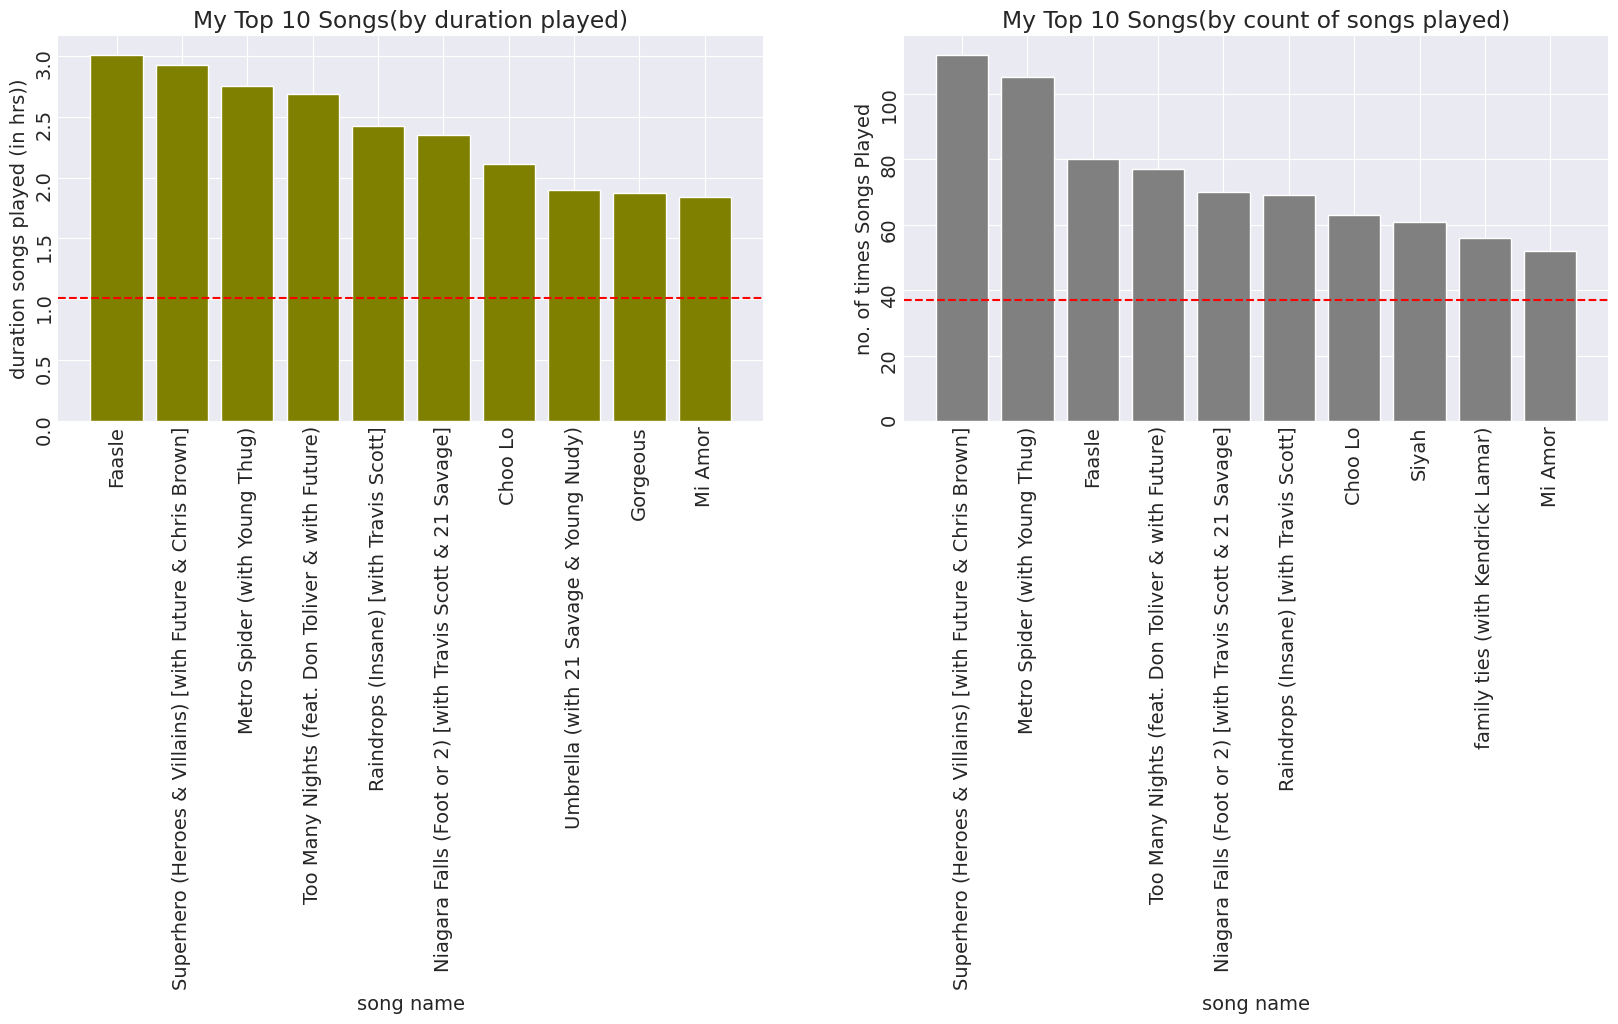

In [354]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

ax1.bar(top_10_songs_time_df.head(10).index,top_10_songs_time_df["Listening Time(Hours)"].head(10), color="olive")
ax1.set(title="My Top 10 Songs(by duration played)",xlabel="song name",ylabel="duration songs played (in hrs))")
ax1.tick_params(labelrotation=90)
ax1.axhline(top_10_songs_time_df["Listening Time(Hours)"][:100].mean(), linestyle="--", color="r")

ax2.bar(top_10_songs_count_df.head(10).index,top_10_songs_count_df["Count"].head(10), color="gray")
ax2.set(title="My Top 10 Songs(by count of songs played)",xlabel="song name",ylabel="no. of times Songs Played")
ax2.tick_params(labelrotation=90)
ax2.axhline(top_10_songs_count_df["Count"][:100].mean(), linestyle="--", color="r")


### 3.4 usage exploration

#### 3.4.1 day wise usage

[Text(0.5, 1.0, 'Day wise % of Spotify Streaming')]

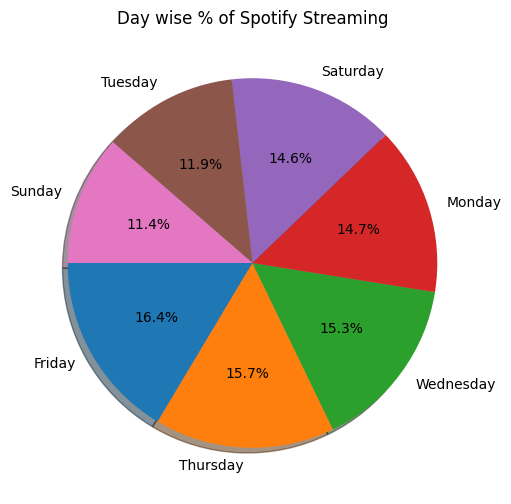

In [355]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(spotify_stream_df["day-name"].value_counts(), labels=spotify_stream_df["day-name"].value_counts().index, autopct='%1.1f%%', startangle=180, shadow = True)
ax.set(title="Day wise % of Spotify Streaming")

This pie chart illustrates that in general On Fridays, I spent more time listening to Spotify.

#### 3.4.2 Average Usage over a day

<Axes: title={'center': 'average distribution of streaming over a day'}, xlabel='Time of day (in 24 hour format)', ylabel='Songs Played'>

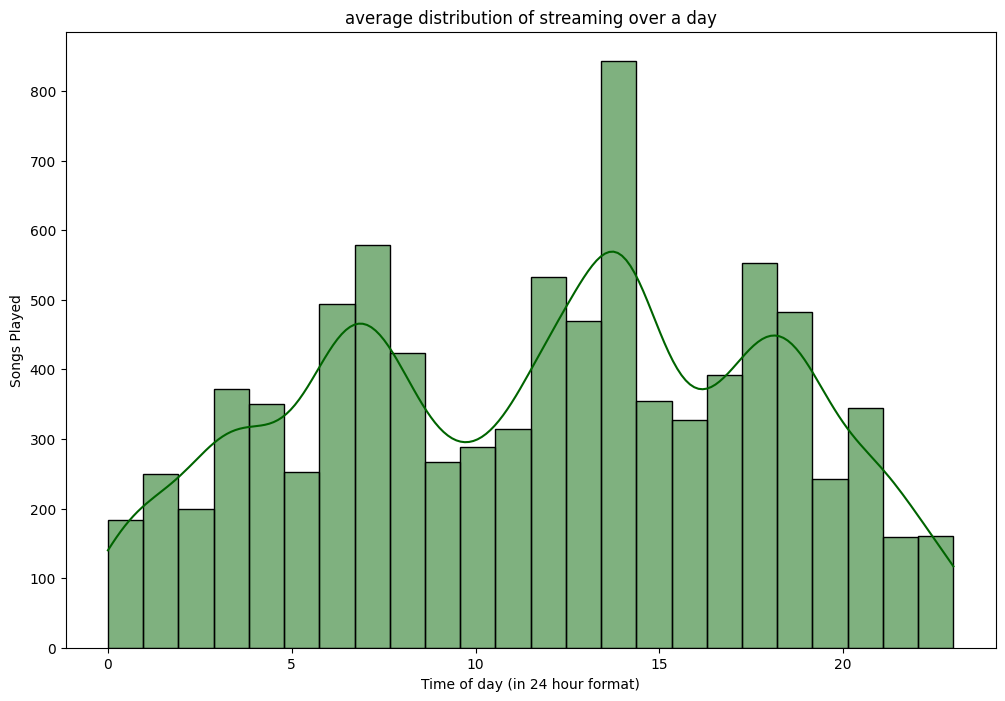

In [356]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set(title="average distribution of streaming over a day",xlabel="Time of day (in 24 hour format)", ylabel="Songs Played")
sns.histplot(spotify_stream_df["hours"], bins=24,kde=True, color="darkgreen")

With this histogram graph we can see my average usage:

Maximum usage is around 2pm.</br>
Minimum usage is around 10pm to 12am.

#### 3.4.3 Average Usage In a Year

[Text(0.5, 1.0, 'Average Spotify Usage over year'),
 Text(0.5, 0, 'Songs Played (Count)'),
 Text(0, 0.5, 'Months (1-12)')]

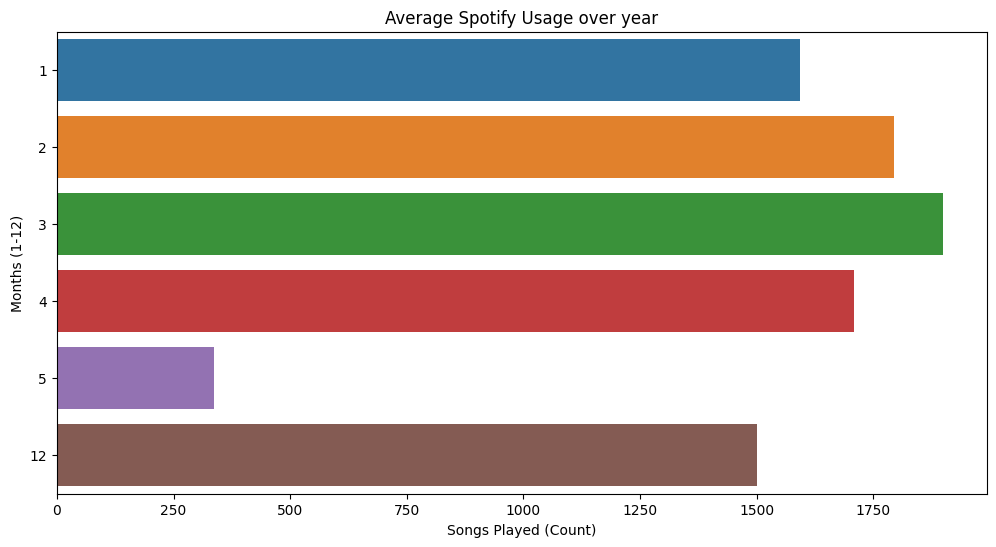

In [357]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(y=spotify_stream_df["month"], ax=ax)
ax.set(title="Average Spotify Usage over year", xlabel="Songs Played (Count)", ylabel="Months (1-12)")

This histogram graph illustrates that in general I spent more time listening to Spotify in the month of March.</br>
The data is from December 2022 to May 2023.</br>
The gap in the data is because I didn't use Spotify in those months.</br>
The small slowdown in December 2022 is because of my end semester exams.</br>

In [358]:
spotify_stream_df['artistName'] = spotify_stream_df['artistName'].replace('\$\$', 'XX', regex=True)


## 4. Playbacks exploration

### 4.1 Artist playbacks

#### 4.1.1 Playback Hours per Artist

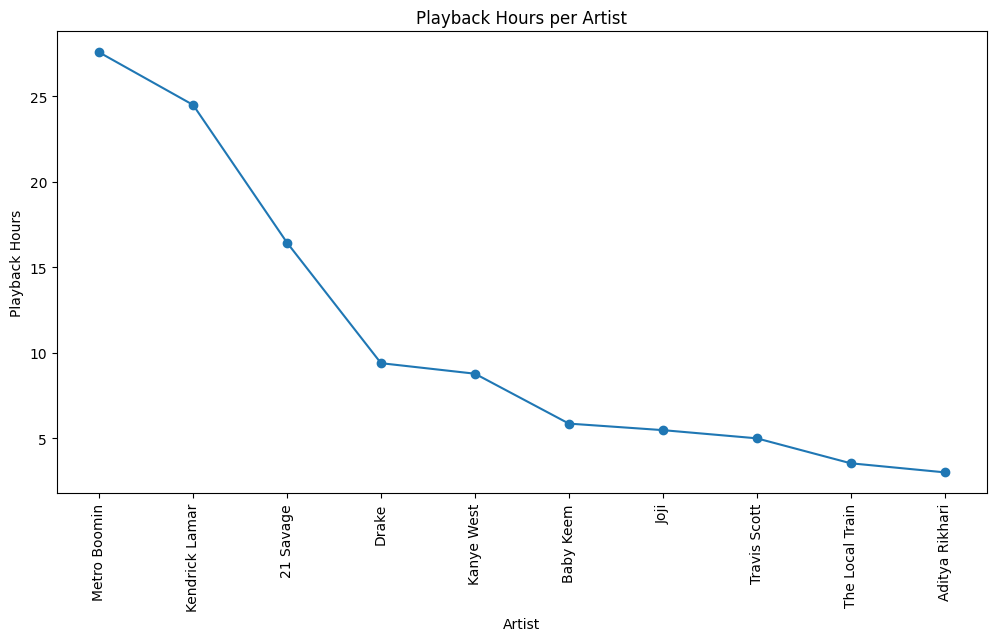

In [359]:
N = 10
artist_df = spotify_stream_df.groupby('artistName')['Listening Time(Hours)'].sum().nlargest(N)

plt.figure(figsize=(12,6))
plt.plot(artist_df.index, artist_df.values, marker='o')

plt.title('Playback Hours per Artist')
plt.xlabel('Artist')
plt.ylabel('Playback Hours')

plt.xticks(rotation=90)

plt.show()


#### 4.1.2 Playback Hours per Month

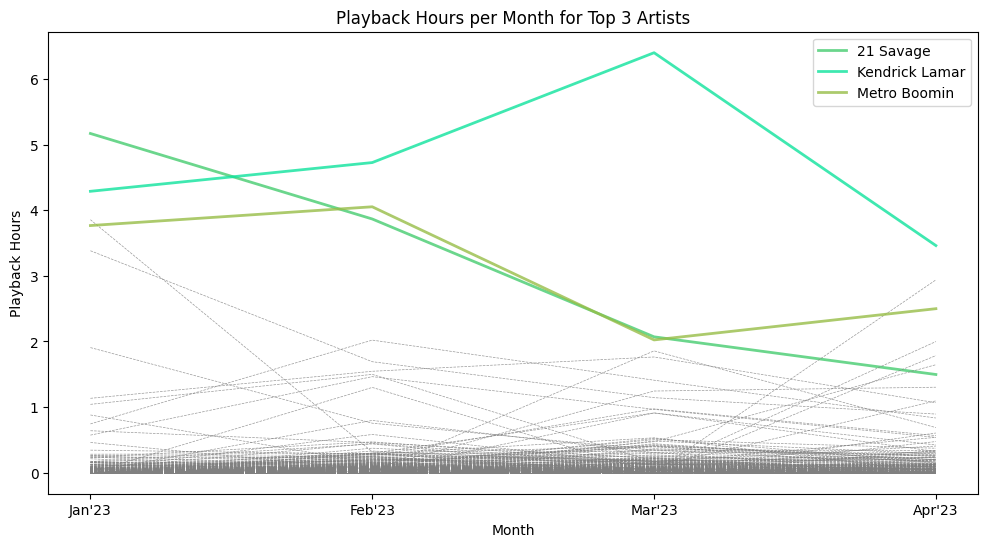

In [360]:
artist_month_df = spotify_stream_df.groupby(['artistName', 'year', 'month'])['Listening Time(Hours)'].sum().reset_index()
top_artists = artist_month_df.groupby('artistName')['Listening Time(Hours)'].sum().nlargest(3).index

artists = artist_month_df['artistName'].unique()
months = pd.date_range('2022-12-01', '2023-05-01', freq='M').strftime('%m').astype(int)
new_rows = []
for artist in artists:
    for month in months:
        new_rows.append({'artistName': artist, 'month': month, 'Listening Time(Hours)': 0})
artist_month_df = pd.concat([artist_month_df, pd.DataFrame(new_rows)])

artist_month_df = artist_month_df.groupby(['artistName', 'month'])['Listening Time(Hours)'].sum().reset_index()


plt.figure(figsize=(12, 6))
for artist in artist_month_df['artistName'].unique():
    if artist in top_artists:
        linestyle = '-'
        linewidth = 2
        label = artist
        color = np.random.rand(3,)
    else:
        linestyle = '--'
        linewidth = 0.5
        label = None
        color = 'grey'
    artist_data = artist_month_df.loc[artist_month_df['artistName'] == artist]
    #remove the values 5-11 from the x-axis
    artist_data = artist_data[artist_data['month'] < 5]
    plt.plot(artist_data['month'], artist_data['Listening Time(Hours)'], label=label, linestyle=linestyle, linewidth=linewidth, color=color, alpha=0.8)


plt.title('Playback Hours per Month for Top 3 Artists')
plt.xlabel('Month')
plt.ylabel('Playback Hours')
handles, labels = plt.gca().get_legend_handles_labels()
top_handles = handles[:3]
top_labels = labels[:3]
plt.legend(handles=top_handles, labels=top_labels)

month_names = ["Jan'23", "Feb'23", "Mar'23", "Apr'23"]
plt.xticks(np.arange(1, 5), month_names)

plt.show()

#### 4.1.3 Weekly Playback Hours

In [361]:
extra_df = spotify_stream_df.copy()
extra_df['weekday_or_weekend'] = extra_df["day-name"].isin(['Sunday','Saturday'])
weekday_vs_weekend = extra_df.groupby(['weekday_or_weekend'])[['Count']].sum()
weekday_vs_weekend["Percentage"] = weekday_vs_weekend["Count"]/weekday_vs_weekend["Count"].sum()*100
weekday_vs_weekend


,Count,Percentage
weekday_or_weekend,,
False,6540,74.04053
True,2293,25.95947


#### Waffle Chart

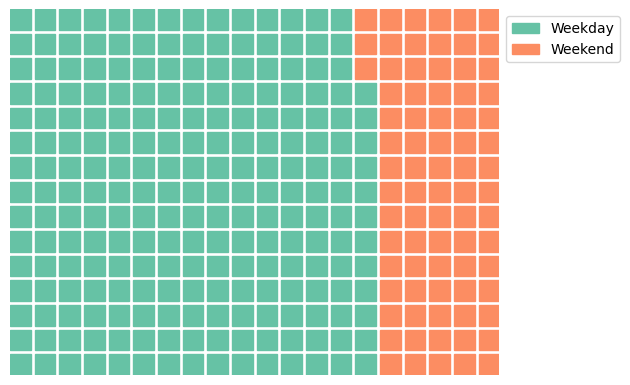

In [362]:
from pywaffle import Waffle
fig = plt.figure(FigureClass=Waffle, rows= 15, columns=20, values={'Weekday': 6548, 'Weekend': 2293},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)})

## 5. Some more insights

### 5.1 How many hours have I spent streaming on Spotify since I first signed up?

In [363]:
time_spent_hours = spotify_stream_df["Listening Time(Hours)"].sum() 
time_spent_hours

207.08499999999998

-> 207 hours, 6 minutes and 46 seconds (approx) since I first signed up.

### 5.2 How much of my year did I spend listening to Spotify?

In [364]:
time_spent_minutes = spotify_stream_df["Listening Time(Minutes)"].sum()
time_spent_minutes

12373.629

In [365]:
five_mon_inmin=5*30*24*60
perc=round((time_spent_minutes/five_mon_inmin)*100,2)
perc

5.73

-> 12,375 minutes that is 5.75% of the past 5 months was spent listening to Spotify.

### 5.3 What is the average numbers of songs I played daily?

In [366]:
total_songs = spotify_stream_df["trackName"].count()
days_in_5mon=5*30
average_songs_played_daily = (total_songs / days_in_5mon).round()
average_songs_played_daily

59.0

-> 59 songs played on average daily. (in the past 5 months)

### 5.4 When were the most songs played?

In [367]:
spotify_stream_df["date"] = spotify_stream_df["Play-Time"].dt.date
most_songs = spotify_stream_df.groupby(["date"])[["Count"]].sum().sort_values(by="Count", ascending=False)
most_songs.head(1)

,Count
date,
2022-12-23,256


-> Most songs (256) were played on 23rd December 2022.

### Scatter plot of Maximum number of songs played in a day

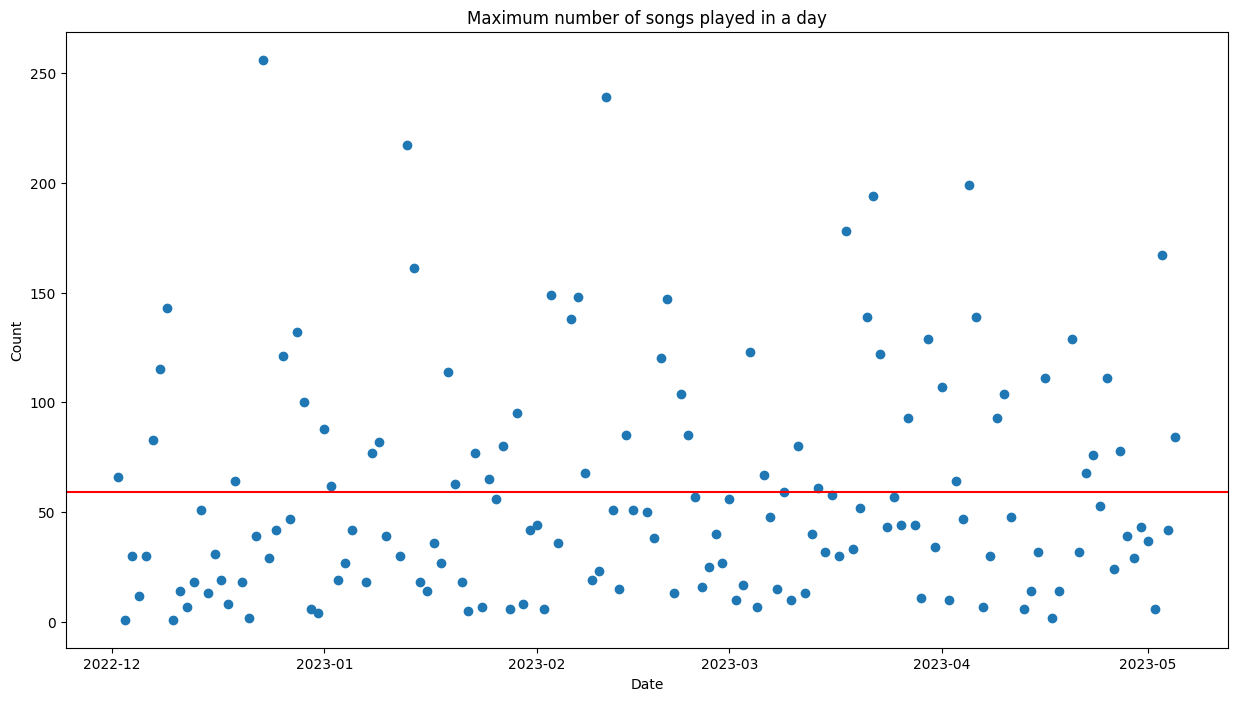

In [368]:
fig,ax = plt.subplots(figsize=(15,8))
ax.scatter(most_songs.index,most_songs["Count"]);
ax.set(title="Maximum number of songs played in a day",xlabel="Date",ylabel="Count");
ax.axhline(most_songs["Count"].mean(), linestyle="-", color="r");

### 5.5 Top 100 Artists and wordcloud to visualize the data

In [369]:
fav_artist = spotify_stream_df.groupby(["artistName"])["Count"].count()
fav_artist.sort_values(ascending=False).head(100)

artistName
Kendrick Lamar    1098
Metro Boomin       893
21 Savage          611
Drake              400
Kanye West         345
                  ... 
Mustard             13
redveil             13
Sohail Sen          12
Kina                12
88rising            12
Name: Count, Length: 100, dtype: int64

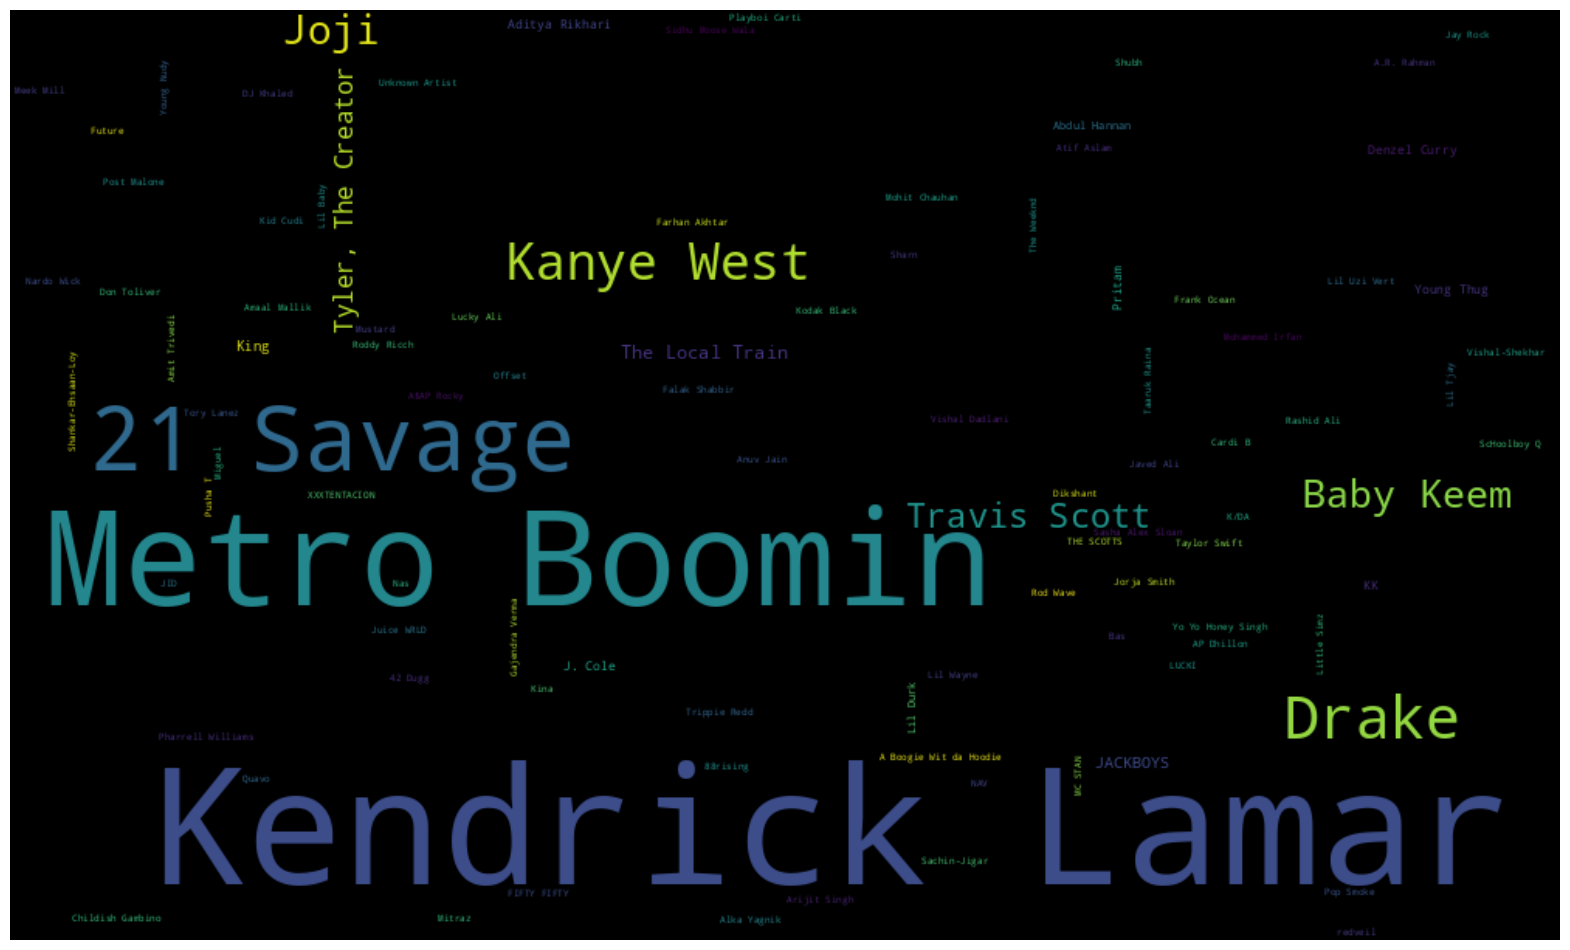

In [370]:
fig, ax = plt.subplots(figsize=(20,15))
wordcloud = WordCloud(width=1000,height=600, max_words=100,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(fav_artist)
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis(False);

### 5.6 Top 100 Tracks and wordcloud to visualize the data

In [371]:
fav_songs = spotify_stream_df.groupby(["trackName"])["Count"].count()
fav_songs.sort_values(ascending=False).head(100)

trackName
Superhero (Heroes & Villains) [with Future & Chris Brown]    112
Metro Spider (with Young Thug)                               105
Faasle                                                        80
Too Many Nights (feat. Don Toliver & with Future)             77
Niagara Falls (Foot or 2) [with Travis Scott & 21 Savage]     70
                                                            ... 
Bubbly (with Drake & Travis Scott)                            23
Mona Lisa (feat. Kendrick Lamar)                              22
rockstar (feat. 21 Savage)                                    22
Pray For Me                                                   22
a lot                                                         22
Name: Count, Length: 100, dtype: int64

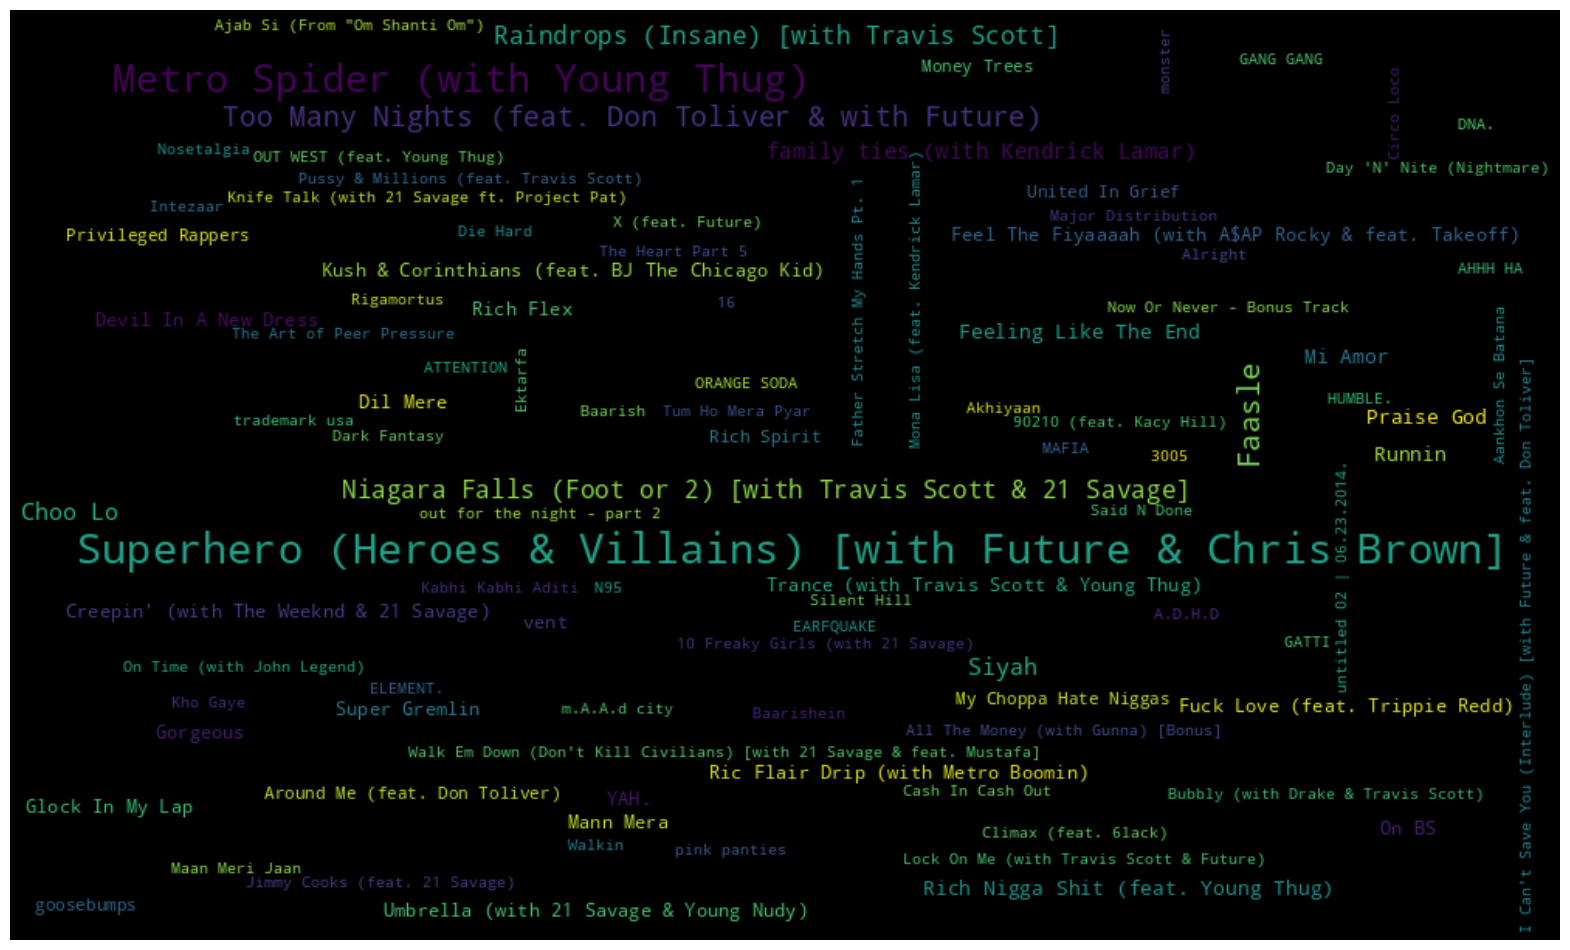

In [372]:
fig, ax = plt.subplots(figsize=(20,15))
wordcloud = WordCloud(width=1000,height=600, max_words=100,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(fav_songs)
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis(False);

## 6. Conclusion

Since my first sign up on Spotify, 5months ago:</br>
- I have spent 207 hours, 6 minutes and 46 seconds (approx) since I first signed up.
- 12,375 minutes that is 5.75% of the past 5 months was spent listening to Spotify.
- 59 songs played on average daily. (in the past 5 months)
- Most songs (256) were played on 23rd December 2022.
- I have played 1816 unique songs
- I have played music from 695 unique artists
- On Fridays, I spent more time listening to Spotify.
- Maximum usage is around 2pm.
- On 23rd December 2022, I played 256 songs which is the maximum number of songs played in a day.
- My favourite artist is Kendrick Lamar with 1098 playbacks.
- My favourite track is 'Superhero (Heroes & Villains)' with 112 playbacks.

## 7. References
- [kmcd14/spotify](https://github.com/kmcd14/spotify)
- [Spotify personal data analysis using R by Joy Pham](https://medium.com/@joypham7/spotify-personal-data-analysis-858c8fbe6983)
- [Spotify Data Analysis and Visualisation with Python by Jeremy Onim](https://blog.devgenius.io/spotify-data-analysis-with-python-a727542beaa7)

## 8. Future Work
- Feature Engineering
- Predictive Analysis to predict the next song I will play based on my previous listening history.
- Make playlist based on my listening history
- Streamlit app to visualize the data just by uploading the data file.